In [1]:
import numpy             as np
from sklearn.ensemble    import IsolationForest
from sklearn.neighbors   import LocalOutlierFactor
import matplotlib.pyplot as plt

# **Détection d’anomalies par une forêt d’isolement et le facteur de valeurs aberrantes locales**

In [2]:
np.random.seed(42)
X = np.array([[-15, 25]])
X = np.concatenate([X, np.random.normal(loc=0, scale=3, size=(300, 2))])

## **Voir l'état sur un diagramme à dispersion**

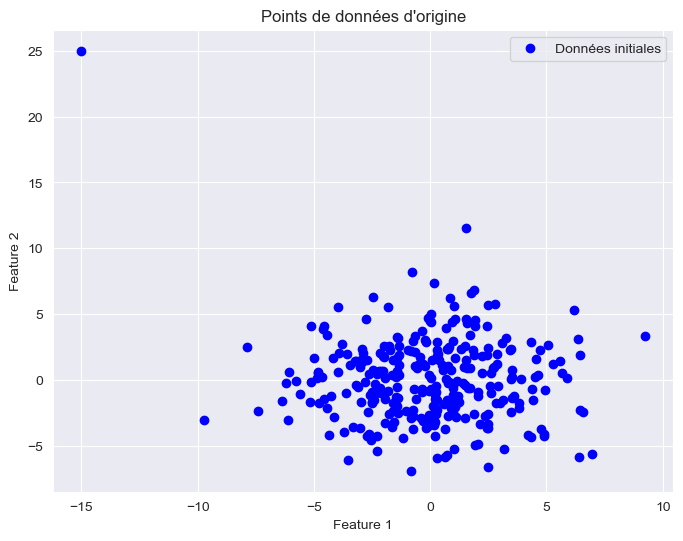

In [3]:
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c='blue', label='Données initiales')
plt.title("Points de données d'origine")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)

## **Identifier les valeurs avérantes avec '`isolation forest`'**

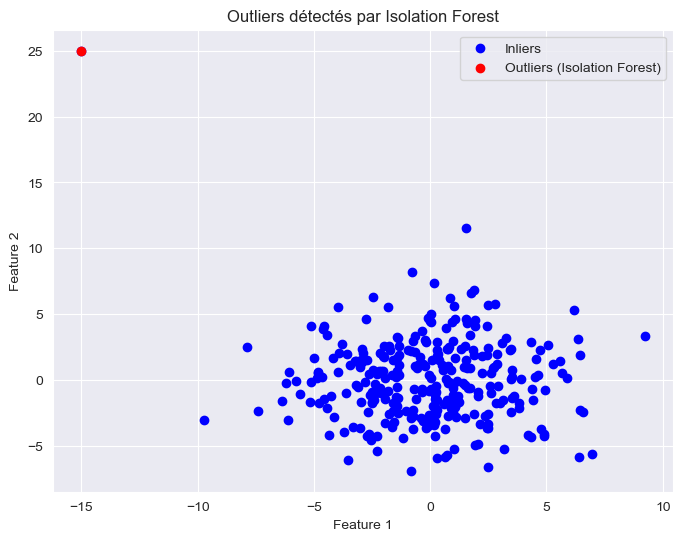

In [4]:
clf = IsolationForest(n_estimators=20, contamination=0.001)
clf.fit(X)
outliers_isf = clf.predict(X)
# Tracer les valeurs aberrantes détectées par Isolation Forest
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c='blue', label='Inliers')
plt.scatter(X[outliers_isf == -1, 0], X[outliers_isf == -1, 1], c='red', label='Outliers (Isolation Forest)')
plt.title('Outliers détectés par Isolation Forest')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)

Le paramètre '`n_estimators`' créer 20 arbres de décision, et le paramètre '`contamination`' est utilisé pour contrôler la valeur du seuil.
En augmentant la valeur du paramètre '`contamination`' à 0.01, le modèle trouvera plus d'outliers.

## **Utiliser le facteur de valeurs aberrantes locales (Local Outlier Factor)**

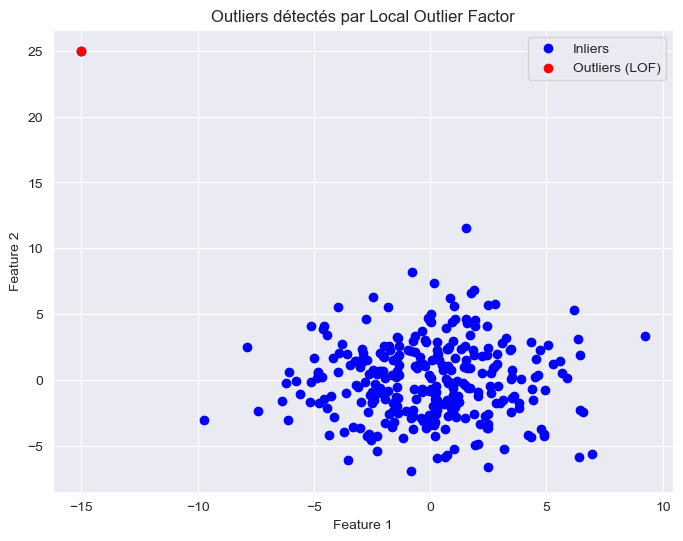

In [5]:
lof          = LocalOutlierFactor(n_neighbors=20, contamination=0.001)
outliers_lof = lof.fit_predict(X)
# Tracer les valeurs aberrantes détectées par le Local Outlier Factor
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c='blue', label='Inliers')
plt.scatter(X[outliers_lof == -1, 0], X[outliers_lof == -1, 1], c='red', label='Outliers (LOF)')
plt.title('Outliers détectés par Local Outlier Factor')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)

Le résultat es analogue.